# Visualisation de données géospatiales

## Bonnes pratiques appliquées aux feux de forêts

L'objectif de cet atelier est de pratiquer la datavisualisation en Python avec la librairie **plotly.express** en utilisant les jeux de données disponibles sur les incendies de forêts ainsi que l'indice d'humidité des sols.

**Francis Wolinski**

Consultant scientifique indépendant depuis 2013, bénéficiaire du programme résidentiel de **datacraft**
- Audit, Conseil et Projets en Data Science
- Formations professionnelles et enseignement de Python au niveau Master

Septembre 2022

In [34]:
# imports
import glob

import numpy as np
import pandas as pd

import plotly.express as px

## 1. Jeux de données sur les incendies

### 1.1 BDIFF

**Base de Données sur les Incendies de Forêts en France**

> La base de données sur les incendies de forêt (BDIFF) est une application internet chargée de centraliser l'ensemble des données sur les incendies de forêt sur le territoire français depuis 2006 et de mettre l'ensemble de cette information à disposition du public et des services de l'Etat.
>
> L'application permet, à tout utilisateur intéressé, de consulter des données nationales, sur les feux de forêt jusqu'à l'année antérieure à l’année en cours et ce, agrégées à la commune.

https://bdiff.agriculture.gouv.fr/

In [35]:
# load bdiff
bdiff = pd.read_csv("data/export_BDIFF_incendies_20220823.csv",
                    header=5,
                    sep=";")
bdiff.shape

(41587, 14)

In [36]:
bdiff.head()

Année  Numéro Département Code INSEE                 Commune  \
0   2006       2          01      01148                  Dortan   
1   2006       3          01      01321                Revonnas   
2   2006       4          01      01032               Béligneux   
3   2006       5          01      01109               Collonges   
4   2006       6          01      01384  Saint-Rambert-en-Bugey   

  Date de première alerte  Surface brûlée (m2)  Surface forêt (m2)  \
0     2006-02-27 13:56:00                10000                 0.0   
1     2006-03-15 16:02:00                10000                 0.0   
2     2006-03-16 17:03:00                10000                 0.0   
3     2006-03-27 14:30:00                10000                 0.0   
4     2006-04-24 16:43:00                20000                 0.0   

   Surface autres terres boisées (m2)  Surfaces non boisées naturelles (m2)  \
0                             10000.0                                   0.0   
1                             10000.0                                   0.0   
2                             10000.0                                   0.0   
3                             10000.0                                   0.0   
4                             20000.0                                   0.0   

   Surfaces non boisées artificialisées (m2)  Surfaces non boisées (m2)  \
0                                        0.0                        0.0   
1                                        0.0                        0.0   
2                                        0.0                        0.0   
3                                        0.0                        0.0   
4                                        0.0                        0.0   

  Précision des surfaces           Statut  
0                    NaN  Validé en force  
1                    NaN  Validé en force  
2                    NaN  Validé en force  
3                    NaN  Validé en force  
4                    NaN  Validé en force

In [37]:
# années
bdiff["Année"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [38]:
# départements
bdiff["Département"].unique()

array(['01', '03', '18', '72', '35', '29', '45', '31', '17', '85', '12',
       '68', '37', '56', '46', '86', '16', '71', '50', '38', '58', '91',
       '89', '42', '19', '47', '33', '64', '40', '24', '09', '84', '30',
       '2A', '48', '11', '06', '07', '66', '2B', '34', '83', '26', '13',
       '04', '05', '974', '60', '10', '67', '15', '70', '65', '81', '25',
       '73', '43', '63', '51', '32', '27', '39', '76', '69', '95', '28',
       '41', '61', '54', '57', '88', '22', '74', '21', '77', '55', '94',
       '82', '90', '23', '02', '79', '78', '49', '36', '87', '52', '976',
       '62', '08', '80', '14', '53'], dtype=object)

### 1.2 Prométhée

**La banque de données sur les incendies de forêts en région Méditerranéenne en France**

In [39]:
# https://www.promethee.com/incendies
promethee = pd.read_csv("data/liste_incendies_du_23_08_2022.csv",
                        header=2,
                        sep=";")
promethee.shape

(28318, 11)

In [40]:
promethee.head()

Année  Numéro  Type de feu Département Code INSEE  \
0   2006      47            0          66      66179   
1   2006      48            0          66      66190   
2   2006       1            0          83      83028   
3   2006       4            0          34      34237   
4   2006       2            0          83      83050   

                    Commune           Lieu-dit Code du carreau DFCI  \
0  Saint-Laurent-de-Cerdans       CAN GRATECOS               GC20B4   
1         Salses-le-Château    HAMEAU GARRIEUX               GC44D9   
2                    Callas  Domaine de Vioune              LD44B54   
3                    Roujan       Roquemaliere               GD62K8   
4                Draguignan      les Sallettes              LD24G42   

                Alerte  Origine de l'alerte  Surface parcourue (m2)  
0  2006-01-01 12:50:00                  3.0                   10000  
1  2006-01-01 12:56:00                  3.0                   20000  
2  2006-01-01 15:40:00                  3.0                      30  
3  2006-01-02 18:19:00                  3.0                   37500  
4  2006-01-02 20:57:00                  3.0                     200

In [41]:
# années
promethee["Année"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [42]:
# départements
promethee["Département"].unique()

array(['66', '83', '34', '48', '06', '13', '2A', '2B', '07', '11', '30',
       '05', '26', '84', '04'], dtype=object)

### 1.3 Comparaison

- Nombre d'enregistrements dans BDIFF correspondants à la zone de Prométhée
- Nombre d'enregistrements dans Prométhée correspondants à la période de BDIFF

In [43]:
# nombre d'enregistrements dans BDIFF correspondants à la zone de Prométhée
len(bdiff.loc[bdiff["Département"].isin(promethee["Département"].unique())])

26873

In [44]:
# nombre d'enregistrements dans Prométhée correspondants à la période de BDIFF
len(promethee.loc[promethee["Année"].isin(bdiff["Année"].unique())])

26984

## 2. Visualisations non cartographiques

### 2.1 Nombre d'incendies par an

**Pour BDIFF**

On affiche le nombre d'incendies par an avec la fonction `px.bar()`.

In [45]:
# %load exos/exo_01.py

**Pour BDIFF et Prométhée**

On construit un dataframe aligné avec les données des 2 bases et on affiche en côte à côte le nombre d'incendies par an toujours avec la fonction `px.bar()`.

In [46]:
# %load exos/exo_02.py

### 2.2 Surface brûlée par an

On crée une colonne dans chaque dataframe avec les surfaces en *ha*.

In [47]:
# on passe les m2 en ha
bdiff["Surface brûlée (ha)"] = bdiff["Surface brûlée (m2)"]/10000
promethee["Surface parcourue (ha)"] = promethee["Surface parcourue (m2)"]/10000

**Pour BDIFF**

On affiche la surface brûlée en *ha* par an et la moyenne avec `px.bar()` et la méthode `add_hline()`.

In [48]:
# %load exos/exo_03.py

On affiche les surfaces brûlées par an et la limite des mégafeux (1000 *ha* en Europe) avec la fonction `px.strip()` et la méthode `add_hline()`.

In [49]:
# %load exos/exo_04.py

**Pour BDIFF et Prométhée**

On divise les données de surface brûlée de la base "Prométhée" par celle de "BDIFF" et on affiche le % correspondant à la surface brûlée en Méditerrannée par rapport à l'ensemble de la France avec la fontion `px.bar()` et la méthode `update_layout()` pour modifier le format de l'axe des Y.

In [50]:
# %load exos/exo_05.py

**Pour BDIFF**

On affiche une carte proportionnelle *TreeMap* avec la surface brûlée par année, par département puis par commune avec la fonction `tree_map()`. Pourles communes, on prendra soin de les limiter aux 10 plus grands incendies par exemple.

In [51]:
# %load exos/exo_06.py

## 3. Cartes sur les incendies de forêts

### 3.1 Cartes choroplèthes

Une carte *choroplèthe* (du grec χῶρος  : « zone/région » et πλῆθος  : « grand nombre, multitude ») est une carte thématique où les régions sont colorées ou remplies d'un motif qui montre une mesure statistique.

Pour produire une carte choroplèthe, il faut récupérer un fichier *geojson* de la partie du monde considérée. Ce fichier contient entre autres 2 informations importantes :
- Une clé qui désigne chaque sous-région,
- La description d'un polygone ou d'un multi-polygones sous la forme d'une liste de coordonnées (latitudes et longitudes),

Il faut ensuite faire correspondre les valeurs de la colonne du DataFrame qui contient les données relatives à chaque sous-région avec celles de la clé du fichier *geojson*.

Il est possible ensuite d'utiliser différents fonds de cartes et différents nuanciers.

**Fichier geojson**

Le fichier "./data/departements.geojson" utilisé ci-après provient du site : https://france-geojson.gregoiredavid.fr/ et il faut analyser le fichier pour trouver la clé correspondant à chaque sous-région.

In [52]:
import json

with open("./data/departements.geojson") as f:
    departements = json.loads(f.read())

Analyse du fichier geojson :
- `departements["features"]` est une liste de 96 dictionnaires (les différents départements avec '2A' et '2B')
- chaque dictionnaire contient les clés :
    - 'type': 'Feature'
    - 'geometry': informations géométriques (polygones...)
    - 'properties' : informations d'identification qui permettent de référencer chaque dictionnaire

In [53]:
# liste des valeurs de la clé "code"
codes = sorted([f["properties"]["code"] for f in departements["features"]])
print(*codes)

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 2A 2B 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95


### 3.2 Carte du nombre d'incendies par année

On calcule le nombre d'incendies par année et par département et on affiche une carte avec la fonction `px.choropleth_mapbox()`.

In [54]:
data1 = (bdiff.groupby(["Année", "Département"])
         .size()
         .reset_index()
         .rename(columns={0:"Nombre d'incendies"})
        )

data1.head()

Année Département  Nombre d'incendies
0   2006          01                  12
1   2006          03                   2
2   2006          04                  26
3   2006          05                   5
4   2006          06                 149

In [31]:
!pip list | grep numpy


numpy                         1.21.5
numpydoc                      1.2


In [28]:
!jupyter labextension list

JupyterLab v3.3.2
/home/kapichu/anaconda3/share/jupyter/labextensions
        jupyterlab-plotly v5.6.0 enabled OK
        @jupyter-widgets/jupyterlab-manager v3.0.0 enabled OK (python, jupyterlab_widgets)
        @pyviz/jupyterlab_pyviz v2.0.2 enabled OK (python, pyviz_comms)



In [33]:
!jupyter notebook --version

6.4.8


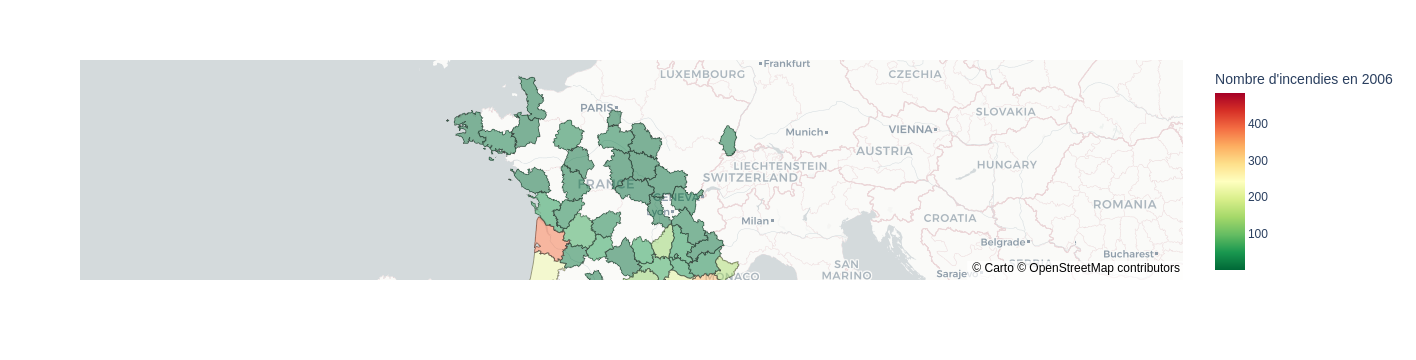

In [55]:
def display_year1(year):
    # select year
    df = data1.loc[data1["Année"]==year]
    
    # choropleth_mapbox
    return px.choropleth_mapbox(data_frame=df,
                                geojson=departements,
                                locations='Département',
                                color="Nombre d'incendies",
                                featureidkey='properties.code',
                                color_continuous_scale="RdYlGn_r",
                                mapbox_style="carto-positron",
                                zoom=4,
                                center={"lat": 47.0, "lon": 3.0},
                                opacity=0.5,
                                labels={"Nombre d'incendies": f"Nombre d'incendies en {year}"},
                                width=700)
    
fig = display_year1(2006)
fig

La carte est incomplète. Il faut rajouter dans "data1" les labels de l'ensemble des départements avec la méthode `reindex()` et en mettant les valeurs à *0*.

In [56]:
# %load exos/exo_07.py

Exemple en utilisant les interactions apportées par la librairie **ipywidgets**.

In [57]:
from ipywidgets import interact, widgets

interact(display_year1, year=widgets.IntSlider(min=2006, max=2021, step=1, value=2006));

interactive(children=(IntSlider(value=2006, description='year', max=2021, min=2006), Output()), _dom_classes=(…

Les échelles obtenues sont spécifiques à chacune des années. Si l'on souhaite féfinir une échelle absolue, il faut passer par la librairie plus complète **plotly.graph_objects** qui définit la classe `Choroplethmapbox` avec les attributs "zmin" et "zmax".

Les informations affichées via **plotly.express** doivent alors être spécifiées manuellement... On voit bien comment `plotly.express` simplifie la production de graphiques en unifiant les arguments de `plotly.graph_objects.Choroplethmapbox` et de la méthode `update_layout()`.

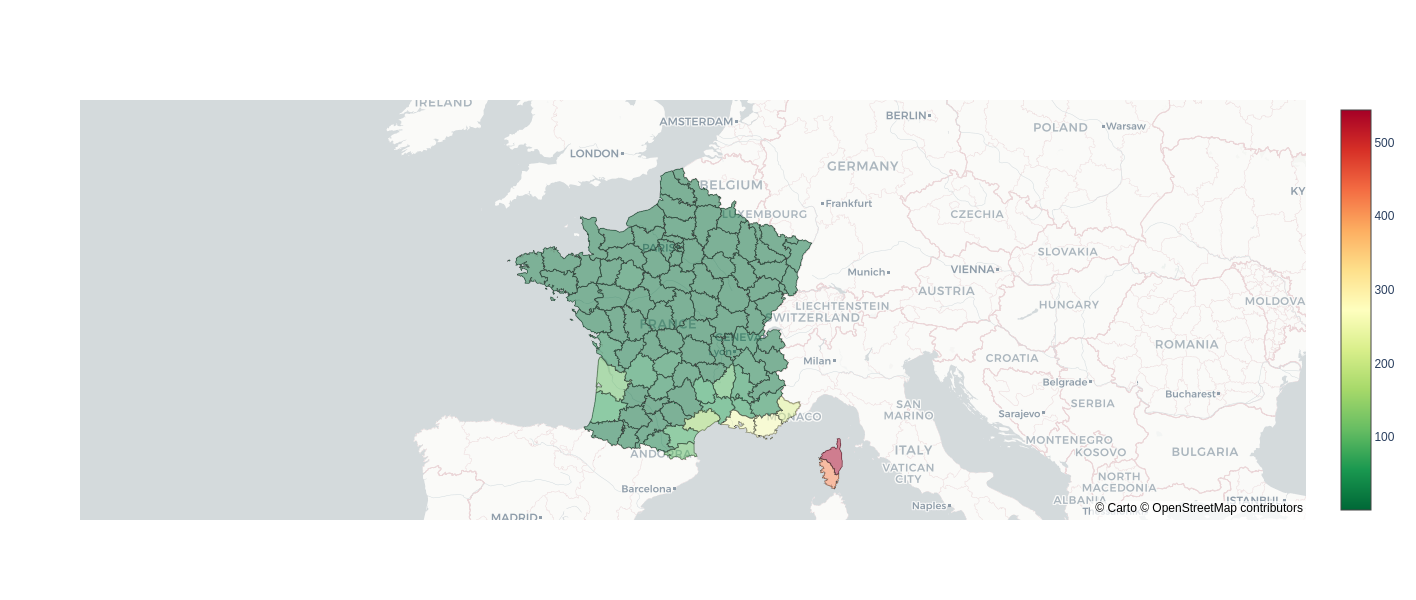

In [58]:
import plotly.graph_objects as go

def display_year1(year):
    # select year and add all labels
    df = (data1.loc[data1["Année"]==year]
          .set_index("Département")
          .reindex(codes)
          .fillna(0)
          .reset_index()
         )
    
    # choropleth_mapbox
    fig = go.Figure(go.Choroplethmapbox(geojson=departements,
                                        locations=df['Département'],
                                        text=df['Département'],
                                        z=df["Nombre d'incendies"],
                                        featureidkey='properties.code',
                                        colorscale="RdYlGn_r",
                                        zmin=data1["Nombre d'incendies"].min(),
                                        zmax=data1["Nombre d'incendies"].max(),
                                        marker_opacity=0.5,
                                        ))
    fig.update_layout(mapbox_style="carto-positron",
                      mapbox_zoom=4,
                      mapbox_center={"lat": 47.0, "lon": 3.0},
                      width=700,
                      height=600)
    return fig
    
display_year1(2007)

### 3.3 Carte de la suface brûlée par année

On calcule dans "data2" la surface brûlée par année et par département et on l'affiche dans une carte avec la fonction `px.choropleth_mapbox()`.

In [ ]:
# %load exos/exo_08.py

### 3.4 Carte des surfaces incendiées par année

**Nuage de points géographiques** 

Pour obtenir la carte des surfaces incendiées, il faut obtenir la longitude et la latitude des communes où les incendies ont eu lieu.

On va utiliser le jeu de données des correspondances des codes Insee : https://public.opendatasoft.com/explore/dataset/correspondance-code-insee-code-postal/information/

On utilise uniquement les colonnes "Code INSEE", "Code Département" et "geo_point_2d" dont on extrait la latitude et la longitude de chaque commune avec la méthode `str.extract()` et une expression régulière. Ensuite on joint les 2 dataframes sur la colonne "Code INSEE".

Enfin, on utilise la fonction `px.scatter_mapbox()` qui permet d'afficher un nuage de points sur une carte.

In [ ]:
# %load exos/exo_09.py

### 3.5 Carte cummulative du nombre d'années avec incendies

On calule le nombre d'années avec incendies par département et on l'affiche dans une carte avec la fonction `px.choropleth_mapbox()`.

In [ ]:
# %load exos/exo_10.py

## 4. Humidité des sols

### 4.1 Indice d'humidité des sols

**Données mensuelles d'indice d'humidité des sols pour le dispositif CatNat.**

> L’indicateur SWI « Uniforme » : Le SWI (de l’anglais Soil Wetness Index ) est un indice d’humidité des sols documenté dans la littérature scientifique. Il représente, sur une profondeur d’environ deux mètres, l’état de la réserve en eau du sol par rapport à la réserve utile (eau disponible pour l’alimentation des plantes).

> Dans le modèle SIM, le territoire de France métropolitaine est découpé en mailles géographiques de 8 kilomètres de côté. Il est ainsi couvert par 8 981 mailles. Chacune des mailles ainsi définie est numérotée et recouvre tout ou partie d’une commune. Ce maillage est fixe et n’évolue pas d’une année sur l’autre. (coordonnées Lambert II étendu).

Source : https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=301&id_rubrique=40

On charge l'ensemble des fichiers en convertissant la colonne "DATE" et en sélectionnant les années postérieures à 2006.

In [ ]:
# load SWI
dfs = []

for filename in glob.glob("SWI_Package_1969-2021/*.csv"):
    df = (pd.read_csv(filename, sep=";", decimal=",")
          .assign(DATE=lambda df_: pd.to_datetime(df_.DATE, format="%Y%m"))
          .loc[lambda df_: df_.DATE.dt.year >= 2006]
          )
    dfs.append(df)


swi = pd.concat(dfs)
swi.shape

In [ ]:
swi.head()

### 4.2 Lambert 93 vers GPS

Pour afficher ces informations dans une carte, il faut passer des coordonnées Lambert aux départements. On va tout d'abord passer des coordonnées Lambert aux coordonnées GPS, puis utiliser le fichier de l'Insee déjà utilisé pour passer des coordonnées GPS aux départements.

Contrairement à ce qui est indiqué dans la documentation, les coordonnées sont en Lambert93 (merci Julien <i class="fa fa-thumbs-up"></i>). Nous allons pouvoir les convertir en coordonnées GPS avec la librairie **lambert**.

In [ ]:
# imports

import matplotlib.pyplot as plt

from lambert import convertToWGS84Deg, Lambert93

In [ ]:
# scatterplot des coordonnées Lambert93
swi.plot.scatter(x="LAMBX", y="LAMBY", s=5);

On unicise les lignes pour ne calculer qu'une seule fois les coordonnées GPS car les données portent sur 16 années. Ensuite on calcule un "LambertPoint" pour chaque ligne avec la fonction `convertToWGS84Deg()` et on récupère la latitude et la longitude des points. Ensuite on recherche pour chacune des mailles la commune la plus proche géométriquement, via sa longitude et sa latitude, qui fournit ensuite le département

In [ ]:
# affectation du département correspondant à chaque maille
def get_departement(lon, lat):
    dist2 = (insee["lon"]-lon)**2 + (insee["lat"]-lat)**2
    return insee.loc[dist2.idxmin(), "Code Département"]

# conversion vers GPS puis obtention du département
swi_gps = (swi[["NUMERO", "LAMBX", "LAMBY"]].drop_duplicates()
           .assign(point=lambda df_: df_.apply(lambda x: convertToWGS84Deg(x[1], x[2], Lambert93), axis=1))
           .assign(lon=lambda df_: df_.point.apply(lambda x: x.getX()),
                   lat=lambda df_: df_.point.apply(lambda x: x.getY()))
           .reset_index(drop=True)
           .assign(code_departement=lambda df_: df_["lon"].combine(df_["lat"], get_departement))
           .sort_values(by="NUMERO")
          )

swi_gps.head()

On obtient bien une carte avec les données issues de SWI, cette fois-ci dans l'échelle GPS.

In [ ]:
# scatterplot des coordonnées GPS
swi_gps.plot.scatter(x="lon", y="lat", s=5);

### 4.3 Carte de l'humidité des sols

On joint le dataset SWI initial avec uniquement les départements obtenus par numéro de maille, on calcule la moyenne de l'indice *SWI* par département et par année (voir la classe `pd.Grouper()` pour utiliser directement la colonne "DATE" passée en index dans un `groupby()`) et on l'affiche dans une carte avec la fonction `px.choropleth_mapbox()`.

In [ ]:
# %load exos/exo_11.py

### 4.4 Todo calcul d'éventuelles corrélations entre incendies et humidité des sols